In [1]:
import numpy as np
import matplotlib.pyplot as plt

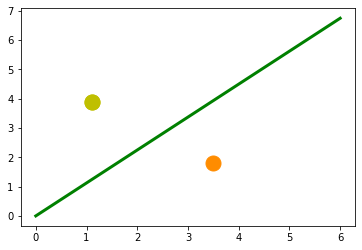

In [2]:
X = np.arange(0, 7)
fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "or", color="darkorange", 
        markersize=15)
ax.plot(1.1, 3.9, "oy", markersize=15)

point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)
m = point_on_line[1] / point_on_line[0]  # gradient
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()

In [3]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4

# amount of y-distance to be added(+) or removed(-) to reach to the seperating line.
# i.e if above -> - and below -> +.

# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])

# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


In [4]:
def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """ returns tuple (d, pos)
            d is the distance
            If pos == -1 point is below the line, 
            0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):  # consider points in 3rd coordinates as well to understand
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance

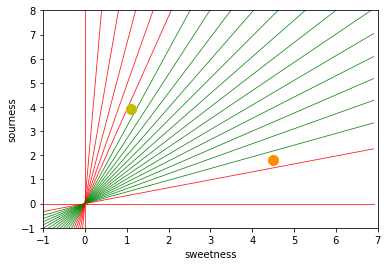

In [5]:
orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
 
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o", 
                color="darkorange", 
                markersize=size)
    else:
        ax.plot(x, y, "oy", 
                markersize=size)


plt.show()

In [6]:
def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi  # angle in radian
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

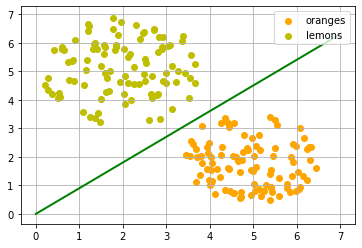

In [7]:
X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, oranges_y, c="orange", label="oranges")
ax.scatter(lemons_x, lemons_y, c="y", label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()

In [8]:
import time
from itertools import repeat
from random import shuffle

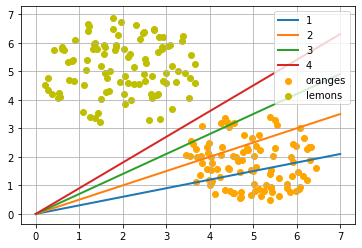

0.8999999999999999


In [9]:
slope = 0.1

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges")
ax.scatter(lemons_x, lemons_y, c="y", label="lemons")

fruits = list(zip(oranges_x, oranges_y, repeat(0, len(oranges_x)))) 
fruits += list(zip(lemons_x, lemons_y, repeat(1, len(oranges_x))))
shuffle(fruits)

learning_rate = 0.2

line = None
counter = 0
for x, y, label in fruits:
    res = slope * x - y
    if label == 0 and res < 0:
        # point is above line but should be below => increment slope
        slope += learning_rate
        counter += 1
        ax.plot(X, slope * X, linewidth=2, label=str(counter))
        
    elif label == 1 and res > 1:
        # point is below line but should be above => decrement slope
        slope -= learning_rate
        counter += 1
        ax.plot(X, slope * X,  linewidth=2, label=str(counter))

ax.legend()
ax.grid()
plt.show()

print(slope)

In [10]:
class Perceptron:
    
    def __init__(self, weights):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum

In [11]:
p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")

for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")

-0.9277075097922527, -0.40121651495719024, -1.3212156463314721, -1.1864260622207548, -0.5416274088931916, -1.0386818924496173, -1.2559594144822517, -1.6440034170678333, -0.6957617110694574, -1.6734432829808155, 1.7791600322775307, 2.199188063146779, 2.6749275024550148, 1.1795041186528696, 2.263292524867925, 0.44454070111565547, 1.7976898766667722, 2.3926086392673285, 2.1266639369672187, 2.374064699131051, 

In [12]:
from collections import Counter

In [13]:
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1


for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

print(evaluation)

Counter({'corrects': 200})


In [14]:
from sklearn.model_selection import train_test_split
import random

In [15]:
oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

In [16]:
# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, 
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])

[(2.4872816270353644, 4.914766639209268), (2.5415866361428607, 5.296076549258629), (4.600749775719295, 1.9785121431036266), (4.546234502888983, 2.015317810114787), (5.980981511538367, 2.3788117671431652), (5.1810441808356265, 0.6171465785629631), (2.4597782950125016, 6.328384403570895), (4.983495851650528, 2.6535155195547144), (3.9837956975527704, 1.2026076499241973), (4.343975263610011, 3.371173492031005)] [1, 1, 0, 0, 0, 0, 1, 0, 0, 0]


In [17]:
class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                


In [18]:
p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-1.71083872  1.68414797]


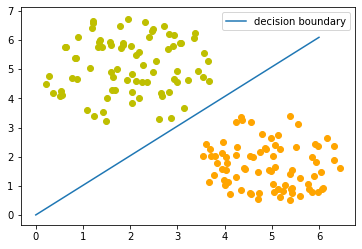

[-1.71083872  1.68414797]


In [19]:
X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)